In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_json('metadata.json')

print(len(df))


17424


In [74]:
# pd.set_option('display.width', 2000)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)



df.sort_values('date').tail()

df.dtypes

# df['date'].value_counts()[:10].index.tolist()


# df[df['date'] == 1776]

title     object
author    object
date       int64
text      object
dtype: object

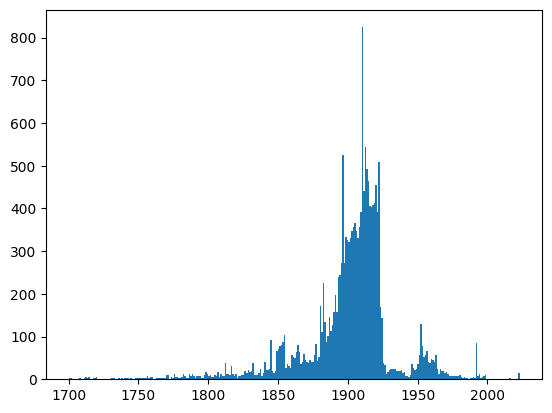

In [75]:
plt.hist(df['date'], bins=300)
plt.show()

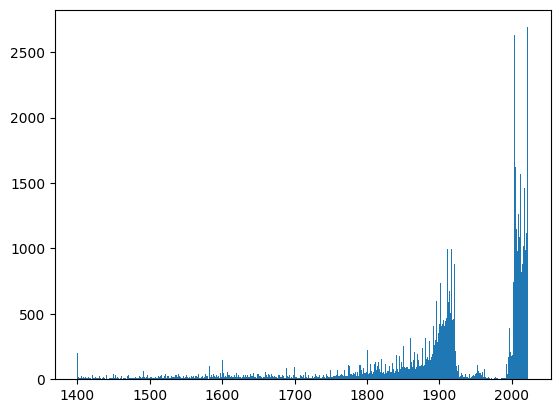

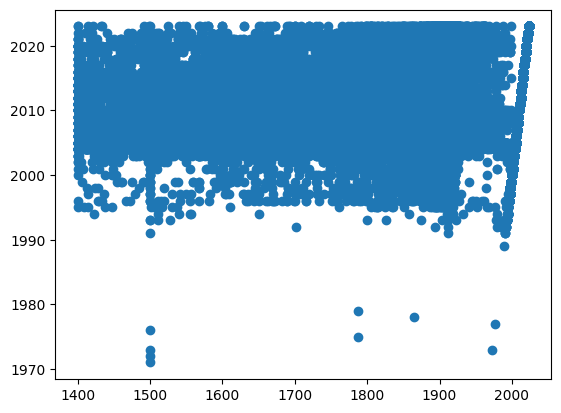

In [26]:
plt.hist(df['date'], bins=500)
# plt.hist(df['date_meta'])
plt.show()

#df = df[df['date'] > 1000]

plt.scatter(df['date'], df['date_meta'])
plt.show()

In [76]:
df

,title,author,date,text
0,The monk and the hangman's daughter,Ambrose Bierce,1889,"Belonging to the Lord, I have no right to love..."
1,Little Willie,Eugene Field,1921,
2,"The Dead Lake, and Other Tales",Paul Heyse,1870,They now saw him leap from the boat but he did...
3,The Wife of his Youth and Other Stories of the...,Charles W. Chesnutt,1899,
4,My Two Countries,Viscountess Nancy Witcher Langhorne Astor Astor,1923,AMERICA I [A] “ I can conceive of nothing wors...
...,...,...,...,...
17419,"Jolly Sally Pendleton; Or, the Wife Who Was No...",Laura Jean Libbey,1897,"CHAPTER VIII. ""OH, I AM SO GLAD THAT YOU HAVE ..."
17420,The Merry Wives of Windsor / The Works of Will...,William Shakespeare,1863,THE MERRY WIVES OF WINDSOR. ACT I. I. 1 Scene ...
17421,"The Little Review, June 1914 (Vol. 1, No. 4)",Various,1914,The Little Review Literature Drama Music Art M...
17422,"The English and Scottish popular ballads, volu...",,1884,ADVERTISEMENT TO PART V NUMBERS 114–155 Rev. P...
